# Import Data & Python Packages

In [2]:
#first we have to import all relevant python packages 
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib import pyplot
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter(action='ignore')

In [4]:
# Read CSV train data file into DataFrame
emp_df = pd.read_csv("D:\Data Science\Course 9\DS2_C5_S3_HR_Data_Practice.csv")
# preview the data
emp_df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<AxesSubplot:xlabel='salary'>

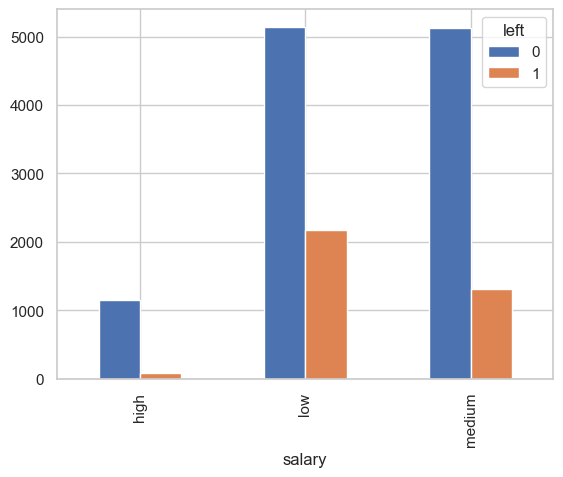

In [8]:
pd.crosstab(emp_df['salary'],emp_df['left']).plot(kind='bar')

<AxesSubplot:xlabel='Department'>

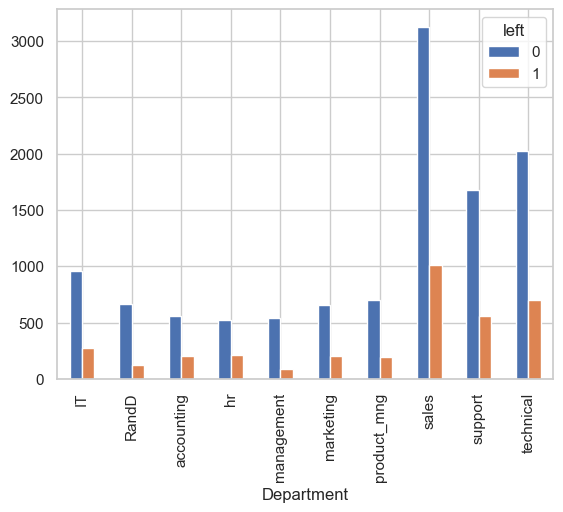

In [7]:
pd.crosstab(emp_df['Department'],emp_df['left']).plot(kind='bar')

# Task 2

In [9]:
emp_df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [11]:
column_correlation = emp_df.corr().T
column_correlation

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


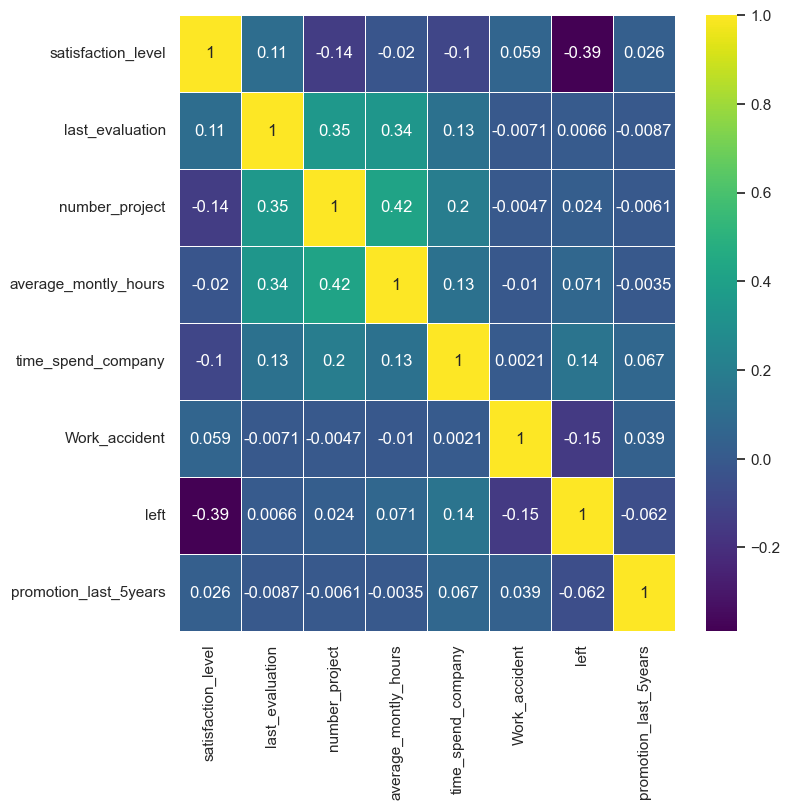

In [57]:
#plt.figure(figure= (10,10))
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(column_correlation,annot=True,linewidths=.5, ax=ax, cmap = "viridis")

plt.show()

In [13]:
#Encoding purpose variable to numeric variable
purpose_encoder = preprocessing.LabelEncoder()

# Encoding of the salary and department
purpose_encoder.fit(emp_df['Department'])
print(purpose_encoder.classes_)
emp_df['Department'] = purpose_encoder.transform(emp_df['Department'])
emp_df.head()

['IT' 'RandD' 'accounting' 'hr' 'management' 'marketing' 'product_mng'
 'sales' 'support' 'technical']


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,low
1,0.80,0.86,5,262,6,0,1,0,7,medium
2,0.11,0.88,7,272,4,0,1,0,7,medium
3,0.72,0.87,5,223,5,0,1,0,7,low
4,0.37,0.52,2,159,3,0,1,0,7,low


In [14]:
# Encoding of the salary and department
purpose_encoder.fit(emp_df['salary'])
print(purpose_encoder.classes_)
emp_df['salary'] = purpose_encoder.transform(emp_df['salary'])
emp_df.head()

['high' 'low' 'medium']


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


# Task 3

# 1. Preparation of training and test dataset

In [31]:
#Creating test and training datasets
emp_train, emp_test = train_test_split(emp_df,train_size = 0.8)
print('Size of training dataset: ', emp_train.shape)
print('Size of test dataset: ', emp_test.shape)

Size of training dataset:  (11999, 10)
Size of test dataset:  (3000, 10)


In [32]:
X_train = emp_train.drop(columns='left', axis =1)
Y_train = emp_train['left']
X_test = emp_test.drop(columns='left', axis =1)
Y_test = emp_test['left']
X_train.shape, Y_train.shape, X_test.shape

((11999, 9), (11999,), (3000, 9))

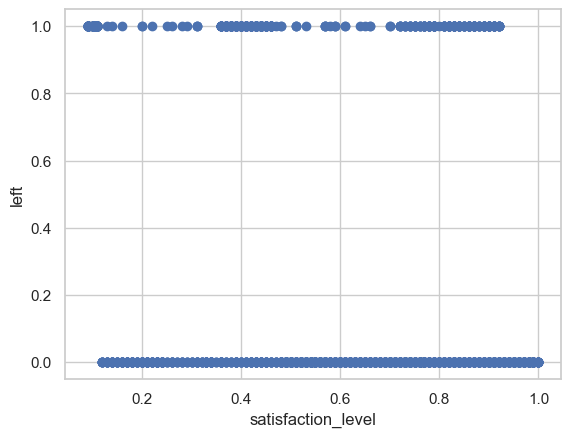

In [33]:
plt.scatter(X_test['satisfaction_level'],Y_test)
#plt.bar(Y_test,X_test['salary'])
plt.xlabel('satisfaction_level')
plt.ylabel('left')
plt.show()

In [34]:
# Logistic Regression - training the model
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

# Using the trained model to predict the outcome of the X_Test dataset
Y_pred = logreg.predict(X_test)

#Calculating the accuracy of the training dataset
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

77.01

In [35]:
logreg.score(X_test, Y_test)

0.774

In [37]:
from sklearn.metrics import accuracy_score
print('accuracy:', accuracy_score(Y_test, Y_pred))

accuracy: 0.774


# Task 4

# 1. Confusion matrix

In [38]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Y_pred))
tn, fp, fn, tp = confusion_matrix(Y_test,Y_pred).ravel()
print(tn, fp, fn, tp)

[[2139  144]
 [ 534  183]]
2139 144 534 183


# 2. ROC-AUC

In [44]:
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(Y_test, logreg.predict_proba(X_test)[:,1])
roc
print("ROC : %.3f" % roc)

ROC : 0.804


In [41]:
 # calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)

# calculate AUC
auc = roc_auc_score(Y_test, Y_pred)
print('AUC: %.3f' % auc)

AUC: 0.596
